In [32]:
import os
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from concurrent.futures import ProcessPoolExecutor
import cv2
from PIL import Image

with open("../classes.txt") as f:
    classes = f.read().splitlines()

In [33]:
results_path = "/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results"
# distance_matrix_files = [path for path in os.listdir(results_path) if path.endswith("distance_matrix.csv")]
distance_matrix_files = [g+"_distance_matrix.csv" for g in classes]

## Similarity Scores

In [35]:
metrics = pd.DataFrame(columns=["gene", "gen_image_path", "real_image_path", "MSE"])
for path in distance_matrix_files:
    print(path)
    df = pd.read_csv(os.path.join(results_path, path), index_col="Unnamed: 0")
    df = df[["gen_image_path", "real_image_path", "MSE"]]
    df["gene"] = [path.split("_")[0]]*len(df)
    metrics = metrics.append(df)

ABCA4_distance_matrix.csv
USH2A_distance_matrix.csv
PRPH2_distance_matrix.csv
RPGR_distance_matrix.csv
BEST1_distance_matrix.csv
CHM_distance_matrix.csv
RS1_distance_matrix.csv
RP1_distance_matrix.csv
RHO_distance_matrix.csv
PRPF31_distance_matrix.csv
MYO7A_distance_matrix.csv
CRB1_distance_matrix.csv
EYS_distance_matrix.csv
CNGB3_distance_matrix.csv
PROML1_distance_matrix.csv
EFEMP1_distance_matrix.csv
TIMP3_distance_matrix.csv
RDH12_distance_matrix.csv
CNGA3_distance_matrix.csv
CACNA1F_distance_matrix.csv
RP2_distance_matrix.csv
GUCY2D_distance_matrix.csv
RPE65_distance_matrix.csv
BBS1_distance_matrix.csv
NR2E3_distance_matrix.csv
MERTK_distance_matrix.csv
CRX_distance_matrix.csv
CERKL_distance_matrix.csv
MTTL1_distance_matrix.csv
OPA1_distance_matrix.csv
PDE6B_distance_matrix.csv
RP1L1_distance_matrix.csv
CYP4V2_distance_matrix.csv
PRPF8_distance_matrix.csv
CDH23_distance_matrix.csv
KCNV2_distance_matrix.csv


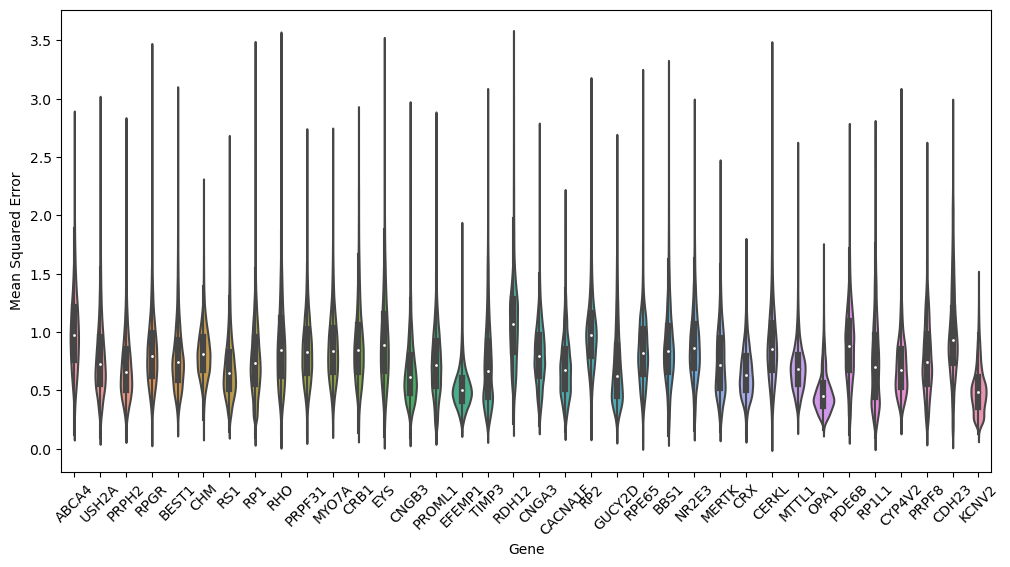

In [37]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=metrics, x="gene", y="MSE")
plt.xlabel("Gene")
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=45)
plt.show()

## Quality Evaluation

In [38]:
results_path = "/home/zchayav/projects/syntheye/quantitative_results/stylegan2_results/brisque_scores"
brisque_scores_path = os.listdir(results_path)

brisque_scores_synthetic = pd.DataFrame(columns=["gene", "Synthetic image path", "Quality Score"])
for path in brisque_scores_path:
    print(path)
    df = pd.read_csv(os.path.join(results_path, path), index_col="Unnamed: 0")
    df["gene"] = path.split("_")[0]
    brisque_scores_synthetic = brisque_scores_synthetic.append(df)
brisque_scores_synthetic["image_type"] = ["synthetic"]*len(brisque_scores_synthetic)
brisque_scores_synthetic.rename(columns={"gene":"gene", "Synthetic image path": "file.path", "Quality Score": "brisq.score"}, inplace=True)
brisque_scores_synthetic.reset_index(inplace=True, drop=True)

CNGB3_quality_scores.csv
OPA1_quality_scores.csv
RP1_quality_scores.csv
BEST1_quality_scores.csv
CNGA3_quality_scores.csv
CRX_quality_scores.csv
CERKL_quality_scores.csv
RPE65_quality_scores.csv
RP2_quality_scores.csv
CYP4V2_quality_scores.csv
USH2A_quality_scores.csv
TIMP3_quality_scores.csv
CHM_quality_scores.csv
PRPF8_quality_scores.csv
RHO_quality_scores.csv
PROML1_quality_scores.csv
BBS1_quality_scores.csv
GUCY2D_quality_scores.csv
EYS_quality_scores.csv
PRPF31_quality_scores.csv
NR2E3_quality_scores.csv
RS1_quality_scores.csv
MERTK_quality_scores.csv
MTTL1_quality_scores.csv
CACNA1F_quality_scores.csv
RP1L1_quality_scores.csv
CRB1_quality_scores.csv
RPGR_quality_scores.csv
CDH23_quality_scores.csv
EFEMP1_quality_scores.csv
MYO7A_quality_scores.csv
PRPH2_quality_scores.csv
ABCA4_quality_scores.csv
RDH12_quality_scores.csv
KCNV2_quality_scores.csv
PDE6B_quality_scores.csv


In [39]:
brisque_scores_synthetic

,gene,file.path,brisq.score,image_type
0,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,120.816457,synthetic
1,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.944276,synthetic
2,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,112.941172,synthetic
3,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.772265,synthetic
4,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,122.251748,synthetic
...,...,...,...,...
10582,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,85.063787,synthetic
10583,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,84.458651,synthetic
10584,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,103.425903,synthetic
10585,PDE6B,/home/zchayav/projects/stylegan2-ada-pytorch/s...,114.118802,synthetic


In [46]:
real_results_path = "/home/zchayav/projects/syntheye/datasets/eye2gene_new_filepaths/all_baf_valid_50deg_filtered_train_0_edited.csv"
real_df = pd.read_csv(real_results_path)
real_df = real_df[real_df.fold != -1]
real_df = real_df[["gene", "file.path", "brisq.score"]]
real_df["image_type"] = ["real"]*len(real_df)
real_df.reset_index(drop=True, inplace=True)

In [47]:
from brisque import BRISQUE
from tqdm import tqdm
brisq = BRISQUE()

# modify brisq values
new_brisq = np.zeros(len(real_df))
for i, row in tqdm(real_df.iterrows()):
    img = Image.open(row["file.path"])
    img = img.resize((512, 512))
    new_brisq[i] = brisq.get_score(np.array(img))
    
real_df["brisq.score"] = np.array(new_brisq)

10587it [11:14, 15.69it/s]


In [48]:
real_df

,gene,file.path,brisq.score,image_type
0,CNGA3,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,119.133794,real
1,CNGA3,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,119.133794,real
2,CNGA3,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,119.133794,real
3,CNGA3,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,119.133794,real
4,CNGA3,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,117.970868,real
...,...,...,...,...
10582,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,89.424263,real
10583,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,97.026676,real
10584,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,75.174052,real
10585,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,92.499929,real


## Plot distribution of scores

In [49]:
combined_df = pd.concat([brisque_scores_synthetic, real_df], axis=0)
combined_df

,gene,file.path,brisq.score,image_type
0,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,120.816457,synthetic
1,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.944276,synthetic
2,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,112.941172,synthetic
3,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,110.772265,synthetic
4,CNGB3,/home/zchayav/projects/stylegan2-ada-pytorch/s...,122.251748,synthetic
...,...,...,...,...
10582,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,89.424263,real
10583,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,97.026676,real
10584,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,75.174052,real
10585,RPGR,/media/pontikos_nas2/NikolasPontikos/IRD/MEH/E...,92.499929,real


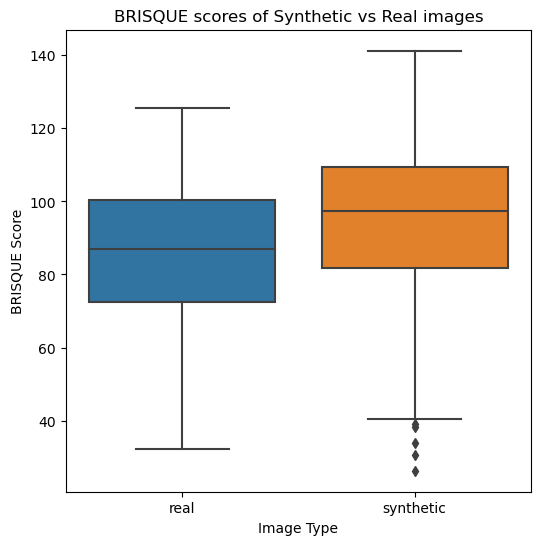

In [60]:
with open("../classes.txt") as f:
    classes = f.read().splitlines()

plt.figure(figsize=(6, 6))
sns.boxplot(data=combined_df, y="brisq.score", x="image_type", order=["real", "synthetic"])
# plt.xticks(rotation=45)
plt.xlabel("Image Type")
plt.ylabel("BRISQUE Score")
plt.title("BRISQUE scores of Synthetic vs Real images")
plt.show()

## Retraining Results

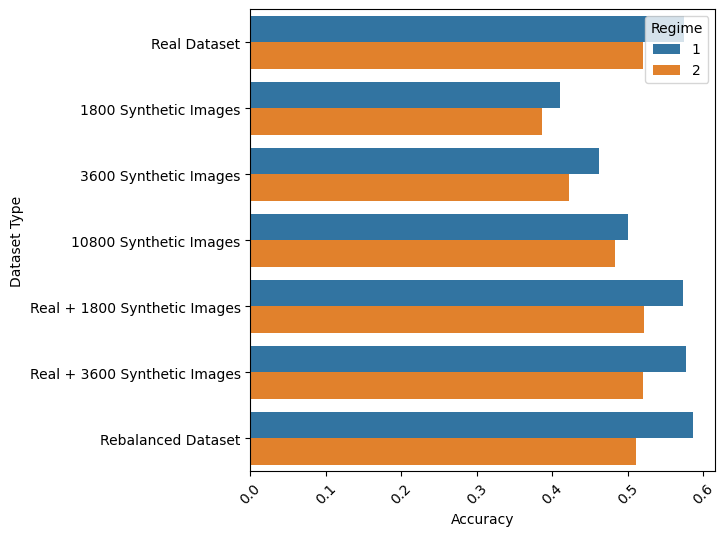

In [75]:
accuracies = [0.5751, 0.5199, 0.4108, 0.3861, 0.4627, 0.4219, 0.5011, 0.4829, 0.5737, 0.5211, 0.5767, 0.5205, 0.5868, 0.5108]
dataset_types = ["Real Dataset", "1800 Synthetic Images", "3600 Synthetic Images", "10800 Synthetic Images", "Real + 1800 Synthetic Images", "Real + 3600 Synthetic Images", "Rebalanced Dataset"]
regimes = [1, 2]
columns=["Dataset Type", "Training Regime", "Accuracy"]
df = pd.DataFrame(columns=columns)

i = 0
for d in dataset_types:
    for r in regimes:
        df1 = pd.DataFrame([[d, r, accuracies[i]]], columns=columns)
        df = pd.concat([df, df1])
        i += 1

df = df.reset_index()
plt.figure(figsize=(6, 6))
sns.barplot(data=df, y="Dataset Type", x="Accuracy", hue="Training Regime")
plt.legend(title="Regime", loc='upper right')
plt.xticks(rotation=45)
plt.show()